# 1. Interpolation 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

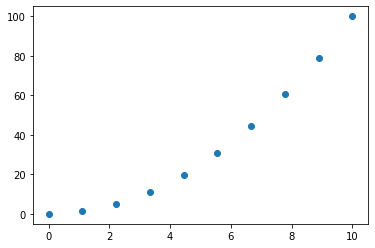

In [5]:
x = np.linspace(0, 10, 10)
y = x**2
plt.scatter(x, y)

In [6]:
from scipy.interpolate import interp1d

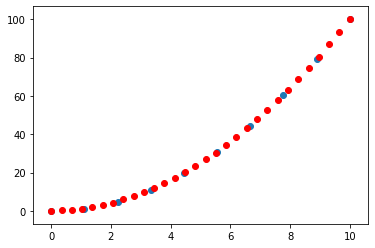

In [8]:
f = interp1d(x, y, kind = "linear")

new_x = np.linspace(0, 10, 30)
result = f(new_x)

plt.scatter(x, y)
plt.scatter(new_x, result, c = "red")

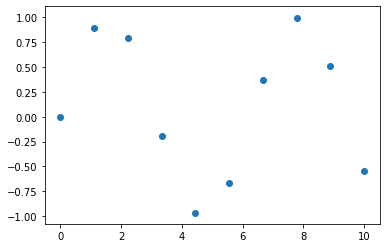

In [9]:
x = np.linspace(0, 10, 10)
y = np.sin(x)
plt.scatter(x, y)

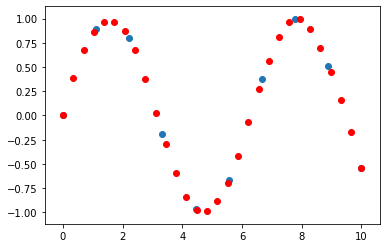

In [15]:
f = interp1d(x, y, kind = "quadratic")

new_x = np.linspace(0, 10, 30)
result = f(new_x)

plt.scatter(x, y)
plt.scatter(new_x, result, c = "red")

# 2. Optimisation #

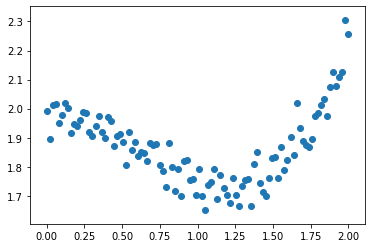

In [16]:
x = np.linspace(0, 2, 100)
y = 1/3 * x**3 - 3/5 * x**2 + 2 + np.random.randn(x.shape[0])/20
plt.scatter(x, y)

In [17]:
def f(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

In [18]:
from scipy import optimize

In [20]:
params, param_cov = optimize.curve_fit(f, x, y)

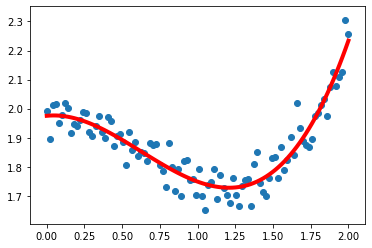

In [25]:
plt.scatter(x, y)
plt.plot(x, f(x, params[0], params[1], params[2], params[3]), c = "red", lw = 4)

### Minimisation ###

In [26]:
def f(x):
    return x**2 + 15 * np.sin(x)

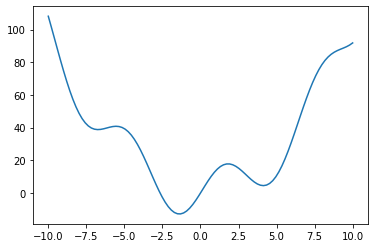

In [27]:
x = np.linspace(-10, 10, 100)
plt.plot(x, f(x))

In [29]:
# minimum local
optimize.minimize(f, x0 = -5)

      fun: -12.823616887804414
 hess_inv: array([[0.05978678]])
      jac: array([3.69548798e-06])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 4
     njev: 9
   status: 0
  success: True
        x: array([-1.38505583])

In [32]:
x0 = -5
result = optimize.minimize(f, x0 = x0).x

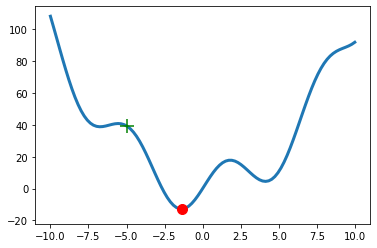

In [33]:
plt.plot(x, f(x), lw = 3, zorder = -1)
plt.scatter(result, f(result), s = 100, c = "red", zorder = 1)
plt.scatter(x0, f(x0), s = 200, marker = "+", c = "green", zorder = 1)
plt.show()

In [34]:
def f(x):
    return np.sin(x[0]) + np.cos(x[0] + x[1]) * np.cos(x[0])

[-0.78539917 -2.35619341]


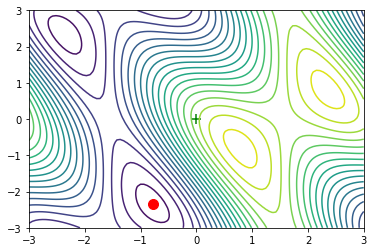

In [37]:
X = np.linspace(-3, 3, 100)
Y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(X, Y)

plt.contour(X, Y, f(np.array([X, Y])), 20)

x0 = np.zeros((2, 1))
plt.scatter(x0[0], x0[1], marker = "+", c = "green", s = 100)

result = optimize.minimize(f, x0 = x0).x

plt.scatter(result[0], result[1], c = "red", s = 100)
print(result)

# 3. Traitement du signal #

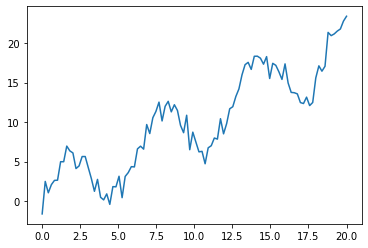

In [38]:
x = np.linspace(0, 20, 100)
y = x + 4*np.sin(x) + np.random.randn(x.shape[0])
plt.plot(x, y)

In [39]:
from scipy import signal

In [40]:
new_y = signal.detrend(y)

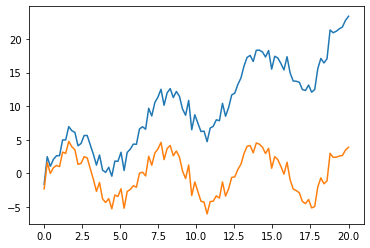

In [41]:
plt.plot(x, y)
plt.plot(x, new_y)

### Transformée de Fourier ###

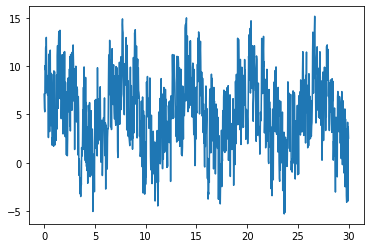

In [49]:
x = np.linspace(0, 30, 1000)
y = 3 * np.sin(x) + 2 * np.sin(5*x) + np.sin(10*x) + np.random.random(x.shape[0]) * 10
plt.plot(x, y)

In [50]:
from scipy import fftpack

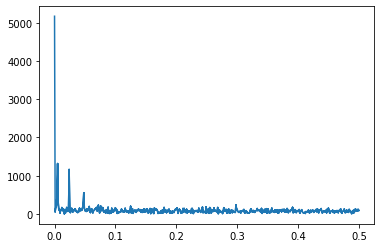

In [51]:
fourier = fftpack.fft(y)
power = np.abs(fourier)
frequences = fftpack.fftfreq(y.size)
plt.plot(np.abs(frequences), power)

In [52]:
fourier[power < 400] = 0

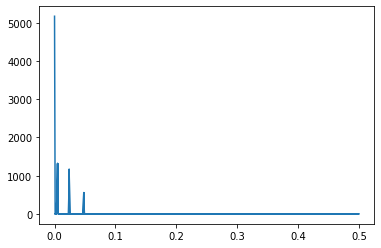

In [53]:
plt.plot(np.abs(frequences), np.abs(fourier))

In [54]:
filtered_signal = fftpack.ifft(fourier)

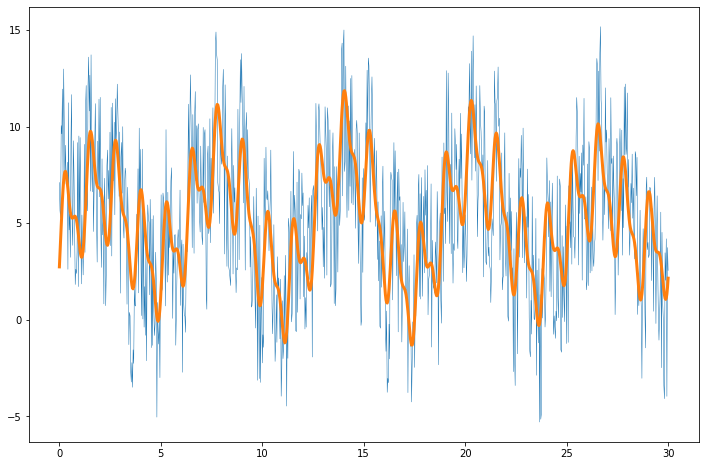

In [56]:
plt.figure(figsize = (12, 8))
plt.plot(x, y, lw = 0.5)
plt.plot(x, filtered_signal, lw = 3)
plt.show()

# 4. Traitement d'images #

In [57]:
from scipy import ndimage

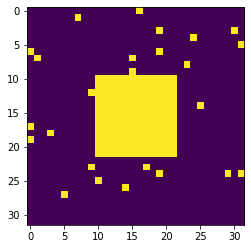

In [59]:
np.random.seed(0)
X = np.zeros((32, 32))
X[10 : -10, 10 : -10] = 1
X[np.random.randint(0, 32, 30), np.random.randint(0, 32, 30)] = 1
plt.imshow(X)

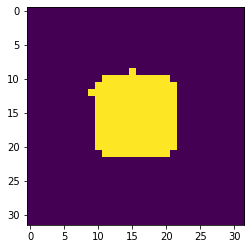

In [60]:
open_x = ndimage.binary_opening(X)
plt.imshow(open_x)

(500, 500)

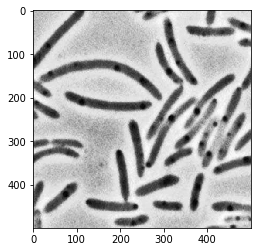

In [3]:
image = plt.imread("004 - bacteria.jpg")
image = image[0 : 500, 100 : 600, 0]
plt.imshow(image, cmap = "gray")
image.shape

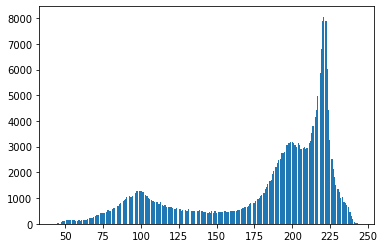

In [86]:
image_2 = np.copy(image)
plt.hist(image_2.ravel(), bins = 255)
plt.show()

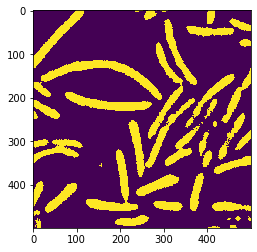

In [87]:
image = image < 150
plt.imshow(image)

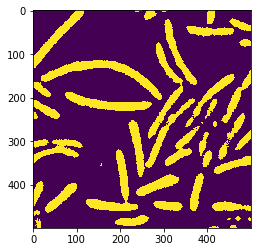

In [88]:
open_x = ndimage.binary_opening(image)
plt.imshow(open_x)

In [89]:
label_image, n_labels = ndimage.label(open_x)
print(n_labels)

51


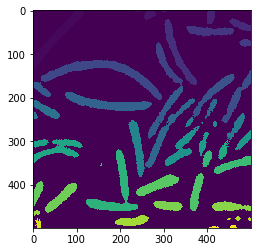

In [90]:
plt.imshow(label_image)

In [91]:
sizes = ndimage.sum(open_x, label_image, range(n_labels))

In [92]:
sizes

array([0.000e+00, 3.090e+03, 6.600e+01, 4.490e+02, 5.700e+01, 5.160e+02,
       7.860e+02, 2.665e+03, 1.803e+03, 3.720e+02, 1.634e+03, 5.631e+03,
       1.904e+03, 2.010e+03, 7.110e+02, 1.997e+03, 3.768e+03, 2.647e+03,
       4.420e+02, 1.130e+03, 1.450e+02, 9.370e+02, 2.350e+02, 2.280e+03,
       1.110e+02, 1.000e+01, 2.133e+03, 6.600e+02, 5.850e+02, 4.640e+02,
       2.476e+03, 5.720e+02, 5.000e+00, 4.224e+03, 5.730e+02, 1.531e+03,
       2.800e+01, 1.479e+03, 2.148e+03, 7.850e+02, 1.791e+03, 1.131e+03,
       1.400e+03, 1.540e+02, 1.253e+03, 9.000e+01, 4.500e+01, 3.000e+01,
       1.980e+02, 8.000e+00, 9.300e+01])

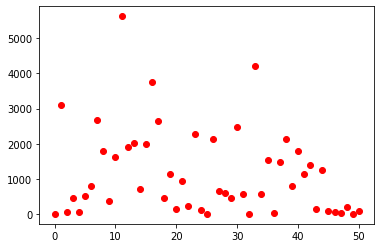

In [93]:
plt.scatter(range(n_labels), sizes, c = "red")